## Author : Loka Akash Reddy
### Innomatics Research Labs - Data Science October - 2021
### Tasks - Data Analysis
### Task 1 : Descriptive Stats
###  Kindly follow the instructions given in this document : https://docs.google.com/document/d/1ktm_p-IeSRvTH2szMWaefstaDH1ZhtrJDcZ899MMhsQ/edit?usp=sharing
### Dataset Link : https://drive.google.com/file/d/1l040PTRmQ9fw5VULbwG-qM6P2A5xZIBQ/view

### Descriptive Statistics and Python Implementation

### Expected Submission:
Write a Jupyter Notebook explaining all the Descriptive Statistics.

* Mean
* Mode
* Variance
* Standard Deviation
* Correlation
* Normal Distribution (use references)
* Feature of Normal Distribution
* Positively Skewed & Negatively Skewed Normal Distribution
* Effect on Mean, Median and Mode due to Skewness
* Explain QQ Plot and show the implementation of the same
* Explain Box Cox and show the implementation of the same


Explain each topic (mentioned above) with the help of images, code examples (with and without library functions) and formulas (written using LaTeX)


References - 👍

LaTeX - https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd

Normal Distribution - http://www.mathnstuff.com/math/spoken/here/2class/90/normal.htm


### What is Descriptive Statistics?
Descriptive statistics involves summarizing and organizing the data so they can be easily understood. Descriptive statistics, unlike inferential statistics, seeks to describe the data, but does not attempt to make inferences from the sample to the whole population. Here, we typically describe the data in a sample. This generally means that descriptive statistics, unlike inferential statistics, is not developed on the basis of probability theory.

### Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


Since Highest_Qualified_Member is an non-numeric data we need to drop it

In [5]:
df.drop('Highest_Qualified_Member',inplace=True,axis=1)

In [6]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,5000,8000,3,2000,64200,1
1,6000,7000,2,3000,79920,1
2,10000,4500,2,0,112800,1
3,10000,2000,1,0,97200,1
4,12500,12000,2,3000,147000,1


### Analyzing the data

In [7]:
df.shape

(50, 6)

In [8]:
df.columns

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'No_of_Earning_Members'],
      dtype='object')

In [9]:
# Getting information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Mthly_HH_Income        50 non-null     int64
 1   Mthly_HH_Expense       50 non-null     int64
 2   No_of_Fly_Members      50 non-null     int64
 3   Emi_or_Rent_Amt        50 non-null     int64
 4   Annual_HH_Income       50 non-null     int64
 5   No_of_Earning_Members  50 non-null     int64
dtypes: int64(6)
memory usage: 2.5 KB


In [10]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.0,41558.00,26097.908979,5000.0,23550.0,35000.0,50375.0,100000.0
Mthly_HH_Expense,50.0,18818.00,12090.216824,2000.0,10000.0,15500.0,25000.0,50000.0
No_of_Fly_Members,50.0,4.06,1.517382,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,50.0,3060.00,6241.434948,0.0,0.0,0.0,3500.0,35000.0
Annual_HH_Income,50.0,490019.04,320135.792123,64200.0,258750.0,447420.0,594720.0,1404000.0
No_of_Earning_Members,50.0,1.46,0.734291,1.0,1.0,1.0,2.0,4.0


In [12]:
df.isna().sum()

Mthly_HH_Income          0
Mthly_HH_Expense         0
No_of_Fly_Members        0
Emi_or_Rent_Amt          0
Annual_HH_Income         0
No_of_Earning_Members    0
dtype: int64

There are no null values in the dataset

### Pair Plots

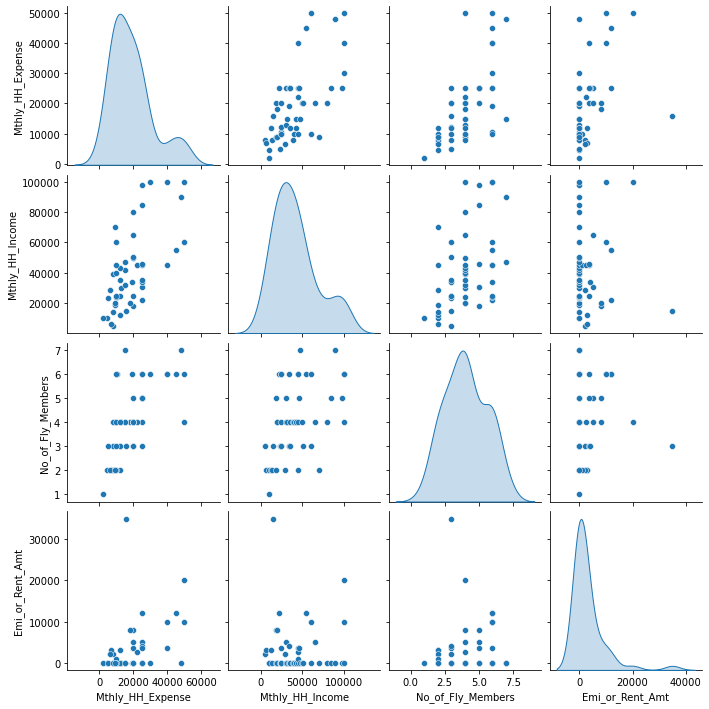

In [13]:
import seaborn as sns
%matplotlib inline 
sns.pairplot(df[ ['Mthly_HH_Expense', 'Mthly_HH_Income', 'No_of_Fly_Members', 'Emi_or_Rent_Amt'] ], 
    diag_kind = 'kde')

### Explaining all the Descriptive Statistics

### Mean
mean() function can be used to calculate mean/average of a given list of numbers. It returns mean of the data set passed as parameters.

Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out. In a way, it is a single number that can estimate the value of the whole data set.

Formula:
$$Mean Formula = \frac{(Sum of Observations)}{(Total Number of Observations)}$$

Similarly, we have a mean formula for grouped data. Which is expressed as
$$\bar{x} = \frac{∑f_x}{N}$$

Where,

* x = the mean value of the set of given data.
* f = frequency of the individual data
* N = sum of frequencies

In [14]:
#with library function
df.mean()

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

In [15]:
#without library function
df.sum()/df.count()

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

### Median
Median is the value that divides the data into 2 equal parts i.e. number of terms on the right side of it is the same as a number of terms on the left side of it when data is arranged in either ascending or descending order.

Note: If you sort data in descending order, it won’t affect the median but IQR will be negative.

The median is calculated by following steps:

1.First sort the data in ascending order.

2.If the number of observations are odd, median is given by the middle observation in the sorted form.

3.If the number of observations are even, median is given by the mean of the two middle observation in the sorted form
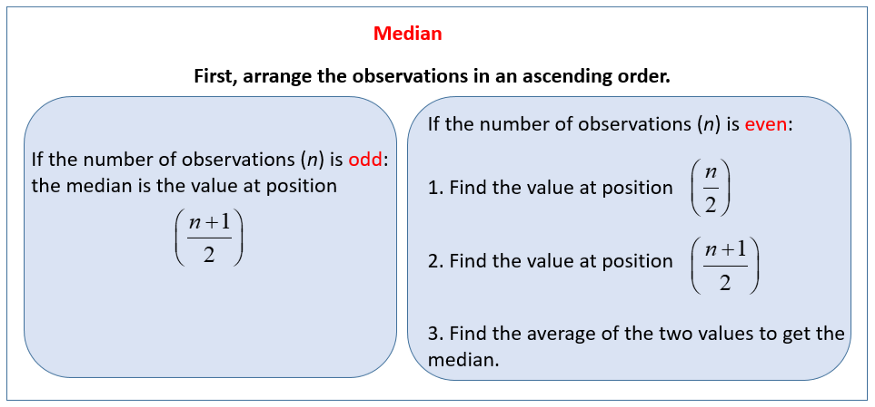

Formula:

$$Median = L_m + [\frac{\frac{n}{2}-F}{f_m}]i$$

Where,

* n = the total frequency.
* F = The cumulative frequency of before class median
* $f_m$ = the frequency of the class median
* i = the class width
* $L_m$ = the lower boundary of the class median

In [16]:
#with library function
df.median()

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64

In [17]:
data = df.apply(lambda x: x.sort_values().values)
n=data.count()
n=int(n[0])
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,5000,2000,1,0,64200,1
1,6000,4500,2,0,79920,1
2,10000,5000,2,0,97200,1
3,10000,6600,2,0,112800,1
4,12500,7000,2,0,147000,1


In [18]:
#without library function
z=list(df.columns)
p=[]
for i in range(6):
    p.append(list(df.iloc[0:,i]))
for i in range(6):  
    if n % 2 == 0:
        median1 = p[i][n//2]

        median2 = p[i][n//2 - 1]
        median = (median1 + median2)/2
    else:
        median =p[i][n//2]

    print(str(z[i]),(median))

Mthly_HH_Income 35000.0
Mthly_HH_Expense 18500.0
No_of_Fly_Members 3.5
Emi_or_Rent_Amt 0.0
Annual_HH_Income 457800.0
No_of_Earning_Members 1.5


We have already soreted our dataset values, and we can see the row count of each column is 50. That means we have an odd number.

### Mode
The mode of a set of data values is the value that appears most often. Mode is the number which has the maximum frequency in the entire data set.

In [19]:
#with library function
df.mode()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,45000,25000,4,0,590400,1


In [20]:
#without library function
for i in range(6):
    m=max(p[i],key=p[i].count)
    print(str(z[i]),':',m)

Mthly_HH_Income : 45000
Mthly_HH_Expense : 25000
No_of_Fly_Members : 4
Emi_or_Rent_Amt : 0
Annual_HH_Income : 590400
No_of_Earning_Members : 1


### Variance
Variance is a square of average distance between each quantity and mean. That is it is square of standard deviation.
Variance is basically a statistical measurement of spread between numbers in a dataset. To be Specific the variance basically measure the distance of data points from the mean of that dataset. Variance is vastly used by investors in sharemarket to see how much risk an investment carries and wheather it will be profitable or not.

Formula : $$σ^2 = {\frac{∑\limits _{i=1} ^{n}{(x_i-\bar{x})^2}}{n-1}}$$


Where

* $x_i$ = $i^{th}$ datapoint
 
* $\bar{x}$ = Mean of all data points
 
* n = Number of data points

In [21]:
from decimal import Decimal
k=data.var()
for i in k:
    print(Decimal(i))

681100853.061224460601806640625
146173342.8571428358554840087890625
2.30244897959183614233324988163076341152191162109375
38955510.204081632196903228759765625
102486925397.9167022705078125
0.539183673469387780841088897432200610637664794921875


In [22]:
#without using built-in function
sum=0
l=[]
mean1=list(data.sum()/data.count())
for i in range(6):
    for j in range(50):
        sum=sum+(p[i][j]-mean1[i])**2
    l.append(sum/n)
    sum=0
print(l)

[667478836.0, 143249876.0, 2.2564, 38176400.0, 100437186889.95831, 0.5284]


In [23]:
df.var()

Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

### Standard Deviation
Standard deviation is basically denotes the measurement of the data dispersion or variation.The Lower value of standard deviation denotes that the datapoints are closer to the mean not spread too much.A higher value of of standard deviation denotes that the data points are spread wide range.

1.The mean value is calculated by adding all the data points and dividing by the number of data points.

2.The variance for each data point is calculated by subtracting the mean from the value of the data point. Each of those resulting values is then squared and the results summed. The result is then divided by the number of data points less one.

3.The square root of the variance—result from no. 2—is then used to find the standard deviation.

Formula : $$σ = \sqrt{\frac{∑\limits _{i=1} ^{n}{(x_i-\bar{x})^2}}{n-1}}$$

Where:

* $x_i$ = Value of the $i^{th}$ point in the dataset
 
* $\bar{x}$ = The mean value of the dataset
 
* n = The number of data points in the dataset

In [24]:
#without using built-in function
import math
sum=0
l=[]
mean1=list(data.sum()/data.count())
for i in range(6):
    for j in range(50):
        sum=sum+(p[i][j]-mean1[i])**2
    l.append(math.sqrt(sum/n))
    sum=0
print(l)

[25835.611779092826, 11968.704023410388, 1.502131818450032, 6178.705366013175, 316918.26531451027, 0.72691127381545]


In [25]:
df.std()

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

### Correlation
Correlation is a statistical measurement to measure the relation betwen two variables. The Correlation between two variables lies between -1 to +1. If our corealation value>1 or <1 then there must be some error in our calculations.The +1 known as perfect positive co-rrelation and -1 denotes the perfect negative correlation.

Formula : $$ρ_{x,y} = ∑\limits _{i=1} ^{n}{(x_i−μ_x)(y_i−μ_y)}$$

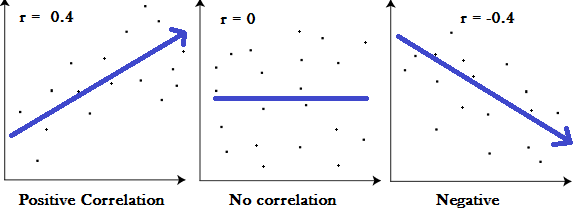

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


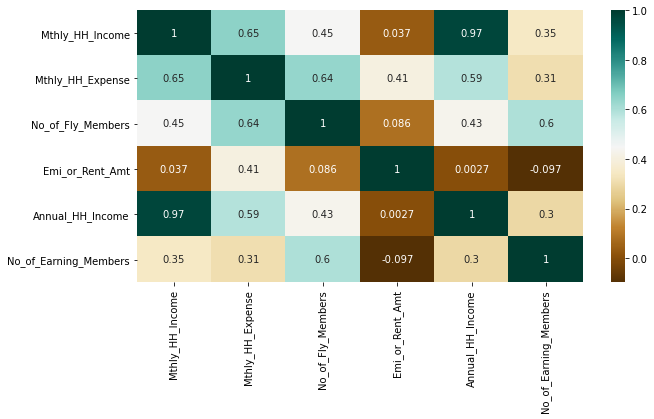

In [26]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [27]:
df.corr(method ='kendall')

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.483825,0.365908,-0.025749,0.872913,0.280929
Mthly_HH_Expense,0.483825,1.000000,0.565001,0.333334,0.472894,0.302092
No_of_Fly_Members,0.365908,0.565001,1.000000,0.088261,0.347993,0.494580
Emi_or_Rent_Amt,-0.025749,0.333334,0.088261,1.000000,-0.018410,-0.115936
Annual_HH_Income,0.872913,0.472894,0.347993,-0.018410,1.000000,0.234381
No_of_Earning_Members,0.280929,0.302092,0.494580,-0.115936,0.234381,1.000000


In [28]:
# Without Library Function

x = p[0]
y = p[1]

x_mean = np.sum(x) / len(x)
y_mean = np.sum(y) / len(y)

cov_xy = [(i - x_mean) * (j - y_mean) for i,j in zip(x, y)]
cov_xy = np.sum(cov_xy) / len(cov_xy)

x_std = (np.sum([(i - x_mean)**2 for i in x]) / len(x)) ** 0.5
y_std = (np.sum([(i - y_mean)**2 for i in y])/len(y)) ** 0.5

correlation = cov_xy / (x_std * y_std)

print('Pearson Correlation Coefficient :', correlation)

Pearson Correlation Coefficient : 0.6492152549316462


### Normal Distribution
Normal distribution is also known as gaussian distribution.It is a probability distribution and also symmetric about the mean and showing the data near the mean are more frequent in occurrence than data far from the mean.

<AxesSubplot:ylabel='Density'>

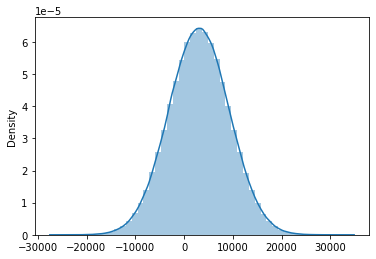

In [29]:
## we are plotting the distribution plot for the first column : Mthly_HH_Income


mean1=np.mean(p[3])
sd=np.std(p[3])

import warnings
warnings.filterwarnings('ignore')
# Plot between -10 and 10 with .001 steps.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Plot between -10 and 10 with .001 steps.
x_axis = np.random.normal(mean1, sd,1000000)
# Mean = 0, SD = 2.
sns.distplot(x_axis)

### Feature of Normal Distribution
It is Symmetric : A normal Distribution should be symmetric that means that the distribution plot will divide the entire dataset into two equal halves.

Mean, Median, Mode is Equal : The middle point of a normal distribution has the maximum frequency.That means this point posseses the most observations of the variable

### Positively Skewed & Negatively Skewed Normal Distribution
In a Distribution if one tail is longer than other tail then it is skew.Skewness also called as assymmetric distributions as they don't show any kind of symmetric properties but normal distribution show the symmetric property

Symmetric means one tail is the mirror image of other half

A left long tail known as left-skewed distribution also known as negative dristibution.

A right long tail distribution known as right skewed distribution also known as positive distribution

**1. Highly skewed distribution**: If the skewness value is less than −1 or greater than +1.

**2. Moderately skewed distribution** : If the skewness value is between −1 and −½ or between +½ and +1.

**3. Approximately symmetric distribution** : If the skewness value is between −½ and +½.

In [30]:
##skewness for the first column
df.skew()

Mthly_HH_Income          0.924615
Mthly_HH_Expense         1.199461
No_of_Fly_Members        0.113674
Emi_or_Rent_Amt          3.403680
Annual_HH_Income         1.192949
No_of_Earning_Members    1.593301
dtype: float64

From the above we can see that the Emi_or_Rent_Amt column is highly skewed

<AxesSubplot:ylabel='Density'>

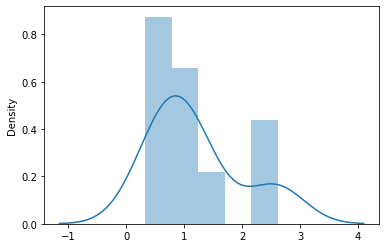

In [31]:
## we are plotting the distribution plot for the first column : Mthly_HH_Income


mean1 = np.mean(p[5])
sd=np.std(p[5])

import warnings
warnings.filterwarnings('ignore')
# Plot between -10 and 10 with .001 steps.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Plot between -10 and 10 with .001 steps.
x_axis = np.random.normal(mean1, sd,10)
# Mean = 0, SD = 2.
sns.distplot(x_axis)

## It is right skewed

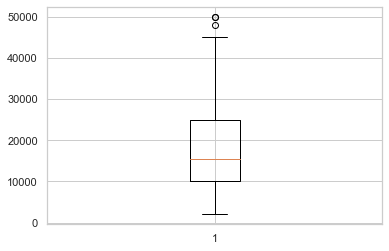

In [32]:
import seaborn as sns
sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots()
ax.boxplot(p[1])
plt.show()

### Effect on Mean, Median and Mode due to Skewness
Among the three measures of central tendancy mean is highly effected by the skewness. For distributions that has outliers we often choose median as a prefer tendency because median is more resistance than mean, that means that if the add any outliers in it then there will be a huge change in mean than median. If we see that the distribution is skewed to the left that means that the mean is less than median, which is often less than the mode. If the distribution is skewed to the right that means the mode is less than the median which is often less than the mean.

### Explain QQ Plot and show the implementation of the same
Q-Q plots also known as Quantile-Quantile plot is plots of two quantiles against each other.The main objective of this plot is to check wheather two sets of data come from the same distribution. We can simply tell the type of distribution by looking at the graph of Q-Q plot

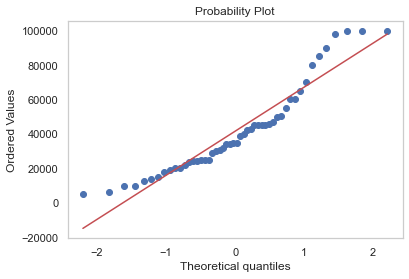

In [33]:
from scipy import stats

stats.probplot(data['Mthly_HH_Income'], dist="norm", plot=plt)

plt.grid()

### Explain Box Cox and show the implementation of the same
A box-cox plot is basically used to convert the non-normally distributed dataset into the normally distributed dataset

<AxesSubplot:ylabel='Density'>

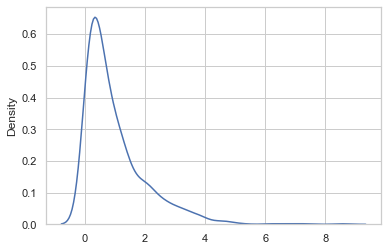

In [34]:
import numpy as np 
from scipy.stats import boxcox 
import seaborn as sns 

#set seed to 0
np.random.seed(0)

#generate dataset
data = np.random.exponential(size=1000)

#plot the distribution of data values
sns.distplot(data, hist=False, kde=True) 

We can see that the data is non-normally distributed. so we need to use the box-cox

plot in-order to make it nomally distributed dataset

<AxesSubplot:ylabel='Density'>

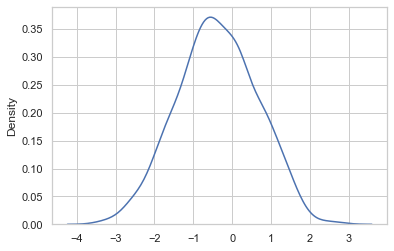

In [35]:
#perform Box-Cox 
transformed_data, best_lambda = boxcox(data) 

#plot the distribution of the transformed data 
sns.distplot(transformed_data, hist=False, kde=True) 

### Conclusion:
**In this task, we have learned about the fundamentals of the most widely used descriptive statistics and their calculations with Python. We have covered the following topics in this task:**

1.Mean

2.Median

3.Mode

4.Variance

5.Standard Deviation

6.Correlation

7.Normal Distribution

8.Feature of Normal Distribution

9.Positively Skewed & Negatively Skewed Normal Distribution

10.Effect on Mean, Median and Mode due to Skewness

11.Explain QQ Plot and show the implementation of the same

12.Explain Box Cox and show the implementation of the same

## Thank you